# Exploratory Data Analysis for Car Insurance Fraud

While all insurance companies have a mechanism to detect insurance fraud, most
of them do so in a really traditional fashion which relies on the use of a SIU
(Special Investigative Unit), by creating rule-based approaches for fraud
detection [Ghatage, n.d.], which can be time consuming and way too big of an
operation for an insurance start-up.

Traditional techniques are not sufficient to combat new and innovative methods
used by fraudsters. Therefore, Machine learning and artificial intelligence solutions are increasingly explored for the purpose of fraud prediction and diagnosis in the insurance domain. Still, all in all, little work has been published on the latter. Most of the state-of-the-art practice and methodology on fraud detection remains well-protected behind the thick walls of insurance companies. [Viaene, 2007]

This is merely an exploratory data analysis to identify the features which we need to take care of, because of they influence in the fraudulent claims. We mainly focus on the features mentioned in [Artis, 2002] and [Mueller, 2013]. [Mueller, 2013] marked the features which we need to take care of, she used a data set from a Swiss insurance company, that is not openly available to the public.

We will be using an openly available data set from Oracle, which can be found on [here](http://www.oracle.com/technology/products/bi/odm/demos/claims.zip), this data set contain audited claims from 1994 to 1996, that is somewhat old but we must work with what is available :)

In [1]:
# import all dependencies and data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import calendar

import utils

%matplotlib notebook
pd.set_option('chained_assignment',None)
sns.set_style("white")

data = pd.read_csv('claims.csv')

After importing the data set, we need to check which variables we can work with

In [2]:
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

Take to notice that the <span style="color:blue">FraudFound_P</span>. feature is our 'target variable' and it shows if a fraud was found in the processed claim.
First we need to check the percentage of Fraudulent claims in our data.

Percentage of fraudulent claims:

* Fraudulent is equal to "1"
* Non Fraudulent is equal to "0"

In [3]:
counted = data.groupby(["FraudFound_P"]).size()
print(counted / counted.sum() * 100)

FraudFound_P
0    94.014267
1     5.985733
dtype: float64


## Temporal Data Features

Good indicators for fraud insurance that we can use, are the temporal variables.
Unfortunately this data set is really old and possibly filled by hand.

We have temporal data such as:

* Year
* Month
* MonthClaimed
* WeekOfMonth
* WeekOfMonthClaimed
* DayOfWeek
* DayOfWeekClaimed


If we generate a plot of the number of claims (Year,Month, WeekOfMonth) and the (Year,MonthClaimed, WeekOfMonth) we can see that the data has some spikes, these are due to manual filling of the claim report, the spikes mean the occurence on the 5th week of the month.

To clean this we will use a function called clean_data, this is a manual conversion of the
(Year, Month, WeekOfMonth, DayOfWeek) format to YYYY-MM-DD normal datetime format of X and XClaimed
the implementation can be found in my [GitHub](https://github.com/joseluisvaz/).

<IPython.core.display.Javascript object>


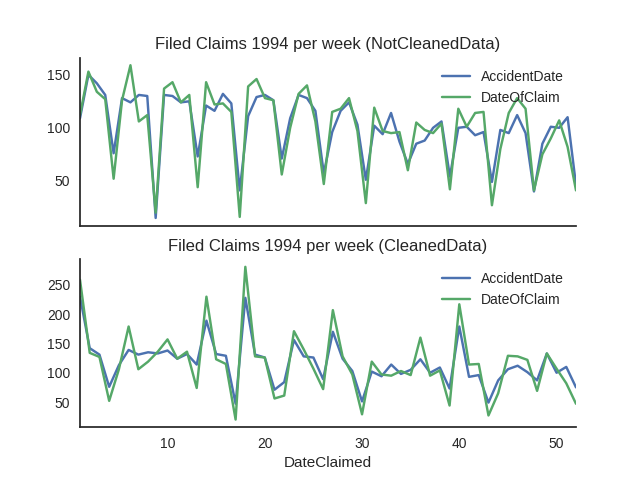

In [4]:
data = utils.clean_data(data)

fig, axes = plt.subplots(nrows=2, ncols=1)
group1 = data.groupby([data[data['Year'] == 1994]['Month'], data['WeekOfMonth']]).size()
group2 = data.groupby([data[data['Year'] == 1994]['MonthClaimed'], data['WeekOfMonthClaimed']]).size()

group1.plot(kind = 'line', label = 'AccidentDate', ax = axes[0])
group2.plot(kind = 'line', label = 'DateOfClaim', ax = axes[0])

group3 = data.groupby([data[data['Date'].dt.year == 1994]['Date'].dt.week]).size()
group4 = data.groupby([data[data['DateClaimed'].dt.year == 1994]['DateClaimed'].dt.week]).size()

group3.plot(kind = 'line', label = 'AccidentDate', ax = axes[1])
group4.plot(kind = 'line', label = 'DateOfClaim', ax = axes[1])

axes[0].set_title('Filed Claims 1994 per week (NotCleanedData)')
axes[0].get_xaxis().set_visible(False)
axes[1].set_title('Filed Claims 1994 per week (CleanedData)')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
sns.despine()
plt.show()

Now that we have the temporal data in Date format, we can take the difference and transform it, to the 'Delay' feature, this was previously done in the `clean_data` function, now we are going to continue and plot it. We will also use a function called `fraud_percentage`, which shows the percentage of fraud occurrences with a feature X as the dependent variable.

This shows that the hypothesis that the number of frauds increases with the delay between AccidentDate and DateOfClaim contributes to the finding of fraudulent claims

<IPython.core.display.Javascript object>


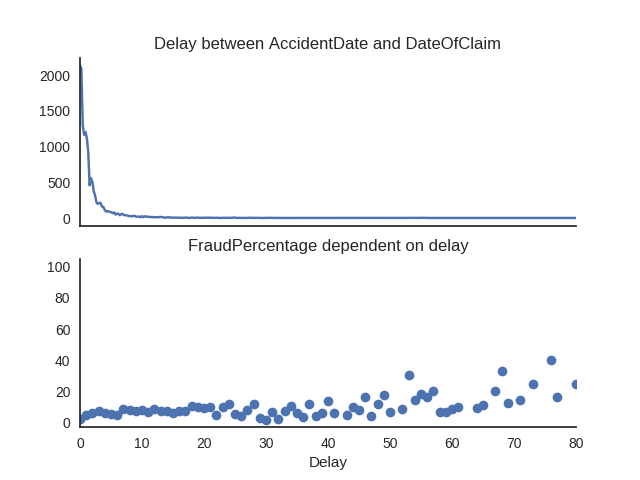

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1)
group1 = data.groupby([data['Delay']]).size()
group2 = utils.fraud_percentage(data, "Delay")
group1.plot(kind = 'line', ax = axes[0])
group2.plot(style = 'o', ax = axes[1])

sns.despine()
axes[0].set_title('Delay between AccidentDate and DateOfClaim')
axes[1].set_title('FraudPercentage dependent on delay')
axes[0].get_xaxis().set_visible(False)
axes[1].set_xlim(0,80)
plt.show()

## Policyholder related features

We also need to check the the variables related to the policy holdder to see how much of them contributen to the fraudulent claims percentage. 

We can see that we have an "Age" Feature and "AgeOfPolicyHolder" Feature, the first is the actual age and the second one is categorical and it shows the age in some interval. 

(Mueller, 2013) says that younger individuals are the ones prone to commit fraud, the percentages support this hypothesis.

<IPython.core.display.Javascript object>


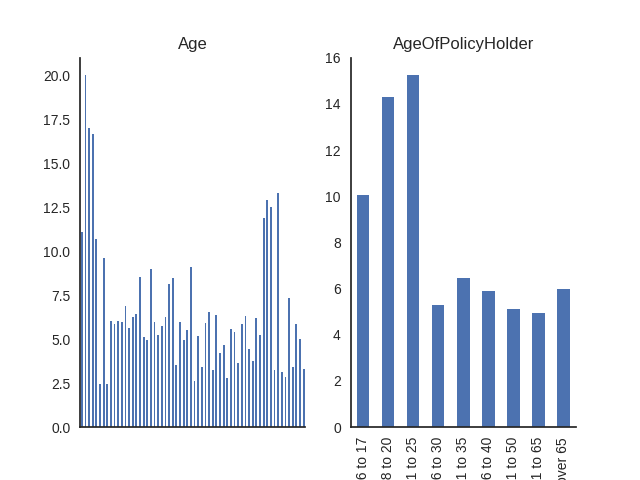

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)
group1 = utils.fraud_percentage(data, "Age")
group2 = utils.fraud_percentage(data, "AgeOfPolicyHolder")
group1.plot(kind = 'bar', ax = axes[0])
group2.plot(kind = 'bar', ax = axes[1])

sns.despine()
axes[0].set_title('Age')
axes[1].set_title('AgeOfPolicyHolder')
axes[0].get_xaxis().set_visible(False)
plt.show()

We can also plot the other PolicyHolder Variables, to see if there is some relation between those and the fraud percentage. The features to examinate are:

* Sex
* MaritalStatus
* PastNumberOfClaims

With this data we can see that the past number of claims, shows some corelation with the percentage of fraud, showing that maybe new costumers are the ones which tend to be fraudulent, and old costumers the ones with more loyalty to the company. Of course this is just an observation and thus no relevant hypothesis can be made from it

<IPython.core.display.Javascript object>


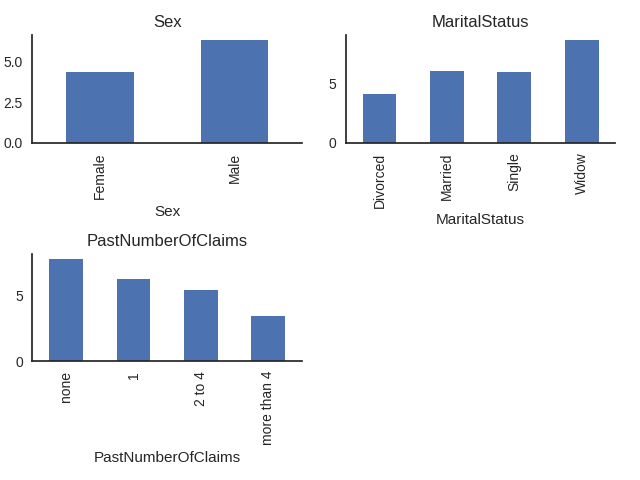

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)

group1 = utils.fraud_percentage(data, "Sex")
group2 = utils.fraud_percentage(data, "MaritalStatus")
group3 = utils.fraud_percentage(data, "PastNumberOfClaims")

#reindexing claims
group3 = group3.reindex(["none", "1", "2 to 4", "more than 4"])

group1.plot(kind = 'bar', ax = axes[0,0])
group2.plot(kind = 'bar', ax = axes[0,1])
group3.plot(kind = 'bar', ax = axes[1,0])

sns.despine()
axes[0,0].set_title("Sex")
axes[0,1].set_title("MaritalStatus")
axes[1,0].set_title("PastNumberOfClaims")
axes[1,1].set_title("")

axes[1,1].axis('off')
plt.tight_layout()
plt.show()

## Vehicle related Features

In this section we try to find wich variables realated to the car give us more information about fraudulent claims. (Mueller, 2013) proposes  that Vehicle Price is somewhat about the percentage of fraud, and that higher cost vehicles, are prone to be part of a fraud.

In the data we can see two spikes, one in the lower-end vehicles and the other one in the upper-end class of vehicles.

* VehiclePrice
* VehicleCategoryw
* Make
* NumberOfCars

<IPython.core.display.Javascript object>


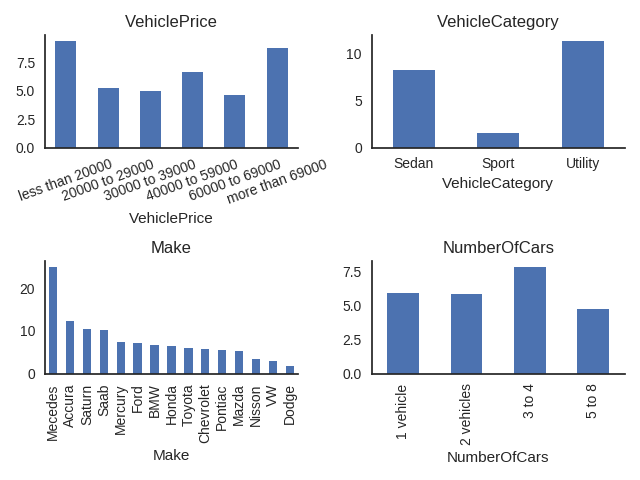

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)

group1 = utils.fraud_percentage(data, "VehiclePrice")
group2 = utils.fraud_percentage(data, "VehicleCategory")
group3 = utils.fraud_percentage(data, "Make").sort_values(ascending = False)
group4 = utils.fraud_percentage(data, "NumberOfCars")

#reindexing claims
group1 = group1.reindex(["less than 20000", "20000 to 29000", 
                         "30000 to 39000", "40000 to 59000", 
                         "60000 to 69000", "more than 69000"])

group1.plot(kind = 'bar', ax = axes[0,0])
group2.plot(kind = 'bar', ax = axes[0,1])
group3.plot(kind = 'bar', ax = axes[1,0])
group4.plot(kind = 'bar', ax = axes[1,1])

sns.despine()
axes[0,0].set_title("VehiclePrice")
axes[0,1].set_title("VehicleCategory")
axes[1,0].set_title("Make")
axes[1,1].set_title("NumberOfCars")

for tick in axes[0,0].get_xticklabels():
        tick.set_rotation(20)
for tick in axes[0,1].get_xticklabels():
        tick.set_rotation(0)

plt.tight_layout()
plt.show()

## Claim and Policy Related Features

Lastly we check the Claim and Policy Related Variables, these variables show us some interesting data such as the percentage of the fraudulent claims when the accident was fault of the driver or fault of a third party. We can see that there is higher chance of fraud when the accident is fault of the policyholder. This is somewhat obvious but it is nice to have data to back it up.


* PoliceReportFiled
* BasePolicy
* PolicyType
* Fault

<IPython.core.display.Javascript object>


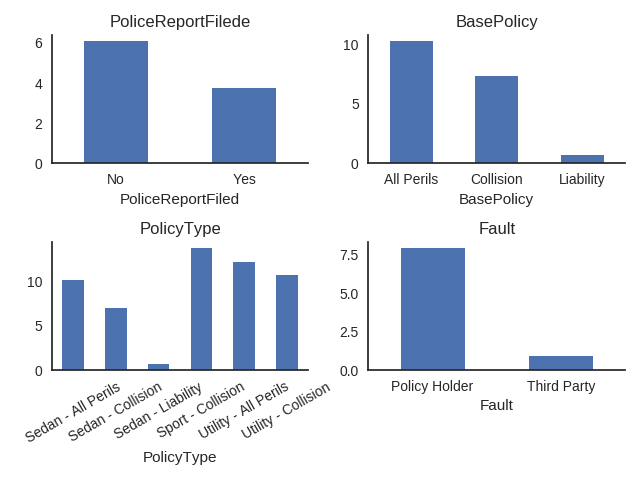

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)

group1 = utils.fraud_percentage(data, "PoliceReportFiled")
group2 = utils.fraud_percentage(data, "BasePolicy")
group3 = utils.fraud_percentage(data, "PolicyType")
group4 = utils.fraud_percentage(data, "Fault")

group1.plot(kind = 'bar', ax = axes[0,0])
group2.plot(kind = 'bar', ax = axes[0,1])
group3.plot(kind = 'bar', ax = axes[1,0])
group4.plot(kind = 'bar', ax = axes[1,1])

sns.despine()
axes[0,0].set_title("PoliceReportFilede")
axes[0,1].set_title("BasePolicy")
axes[1,0].set_title("PolicyType")
axes[1,1].set_title("Fault")

for tick in axes[0,0].get_xticklabels():
        tick.set_rotation(0)
for tick in axes[0,1].get_xticklabels():
        tick.set_rotation(0)
for tick in axes[1,0].get_xticklabels():
        tick.set_rotation(30)
for tick in axes[1,1].get_xticklabels():
        tick.set_rotation(0)

plt.tight_layout()
plt.show()